# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import time
import json
import citipy
import scipy.stats as st

from scipy.stats import linregress
from citipy import citipy

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

#Output data as CSV to appropriate file
output_csv = "output_data/cities.csv"

#create a range for latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#first make lists to hold latitudes and longitudes. Also make a list to hold cities.
lats_lngs = []
cities = []

#generate a random series of latitude and longitude coordinates. Use numpy random function.
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

#use the zip function to combine and place into the empty lats_lngs list
lats_lngs = zip(lats, lngs)

#use citipy to find the city closest to the random lat/lng combos.
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #For each unique city, add it to the empty cities list
    if city not in cities:
        cities.append(city)

#print the cities to confirm sample size is adequate
print(cities)
len(cities)


['sorong', 'faanui', 'butaritari', 'karakendzha', 'bandarbeyla', 'scarborough', 'lisakovsk', 'cape town', 'punta arenas', 'puerto ayora', 'nikolskoye', 'kavaratti', 'olafsvik', 'hermanus', 'ilulissat', 'pochutla', 'rutland', 'busselton', 'east london', 'festus', 'nanakuli', 'severo-kurilsk', 'sao joao da barra', 'thompson', 'vaini', 'bethel', 'zeya', 'sao sepe', 'pastavy', 'ancud', 'arraial do cabo', 'saint anthony', 'rikitea', 'bonavista', 'tuktoyaktuk', 'kruisfontein', 'georgetown', 'ushuaia', 'bredasdorp', 'taveta', 'taolanaro', 'rocha', 'poum', 'belushya guba', 'ca mau', 'ribeira grande', 'albany', 'port alfred', 'jilmah', 'tual', 'karkaralinsk', 'tara', 'bathsheba', 'avarua', 'saskylakh', 'saldanha', 'cayenne', 'filingue', 'souillac', 'kavieng', 'oroville', 'terrak', 'ketchenery', 'oak harbor', 'springbok', 'attawapiskat', 'hamilton', 'bengkulu', 'illoqqortoormiut', 'cherskiy', 'luba', 'ponta do sol', 'yulara', 'castro', 'new norfolk', 'hobart', 'mys shmidta', 'rorvik', 'gurupa', 

574

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#first create the necessary lists and counters to perform all the requested operations
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
windspeed_list = []
index_counter = 0
set_counter = 1

#perform API Calls
##point to the url needed for the data and set the units for the output to imperial
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#set the url for the query
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#construct a for loop that matches city names with the city_list.
##Enumerate is the key here. Documentation: https://docs.python.org/3/library/functions.html?highlight=enumerate#enumerate
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        #now insert all the names of the lists we made and append to them
        city_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response["main"]["temp_max"])
        windspeed_list.append(response["wind"]["speed"])
        
        #use if and else statements pointing to the counters to loop through
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
        
        #return the results with an f string
        print(f"Processing Data {index_counter} of Set {set_counter}:{city}")
        
    #handle the errors with an exception
    except(KeyError, IndexError):
        print("City not located. Moving on.")
print("I'm Finished.")

Processing Data 1 of Set 1:sorong
Processing Data 2 of Set 1:faanui
Processing Data 3 of Set 1:butaritari
City not located. Moving on.
Processing Data 4 of Set 1:bandarbeyla
Processing Data 5 of Set 1:scarborough
Processing Data 6 of Set 1:lisakovsk
Processing Data 7 of Set 1:cape town
Processing Data 8 of Set 1:punta arenas
Processing Data 9 of Set 1:puerto ayora
Processing Data 10 of Set 1:nikolskoye
Processing Data 11 of Set 1:kavaratti
Processing Data 12 of Set 1:olafsvik
Processing Data 13 of Set 1:hermanus
Processing Data 14 of Set 1:ilulissat
Processing Data 15 of Set 1:pochutla
Processing Data 16 of Set 1:rutland
Processing Data 17 of Set 1:busselton
Processing Data 18 of Set 1:east london
Processing Data 19 of Set 1:festus
Processing Data 20 of Set 1:nanakuli
Processing Data 21 of Set 1:severo-kurilsk
Processing Data 22 of Set 1:sao joao da barra
Processing Data 23 of Set 1:thompson
Processing Data 24 of Set 1:vaini
Processing Data 25 of Set 1:bethel
Processing Data 26 of Set 

Processing Data 48 of Set 4:butajira
Processing Data 49 of Set 4:ayan
Processing Data 50 of Set 4:griffith
Processing Data 0 of Set 5:mount gambier
Processing Data 1 of Set 5:port hardy
Processing Data 2 of Set 5:plettenberg bay
Processing Data 3 of Set 5:khasan
Processing Data 4 of Set 5:bairiki
Processing Data 5 of Set 5:makakilo city
Processing Data 6 of Set 5:brae
Processing Data 7 of Set 5:arman
Processing Data 8 of Set 5:saint-philippe
Processing Data 9 of Set 5:akniste
Processing Data 10 of Set 5:umm lajj
Processing Data 11 of Set 5:katobu
Processing Data 12 of Set 5:lebu
Processing Data 13 of Set 5:grand gaube
Processing Data 14 of Set 5:touros
Processing Data 15 of Set 5:prieska
Processing Data 16 of Set 5:atasu
Processing Data 17 of Set 5:san andres
City not located. Moving on.
Processing Data 18 of Set 5:poronaysk
Processing Data 19 of Set 5:san joaquin
Processing Data 20 of Set 5:gao
Processing Data 21 of Set 5:lovozero
Processing Data 22 of Set 5:talara
Processing Data 23 

Processing Data 6 of Set 9:xam nua
Processing Data 7 of Set 9:richards bay
Processing Data 8 of Set 9:berlevag
Processing Data 9 of Set 9:tabas
Processing Data 10 of Set 9:pevek
City not located. Moving on.
Processing Data 11 of Set 9:gillette
Processing Data 12 of Set 9:maceio
Processing Data 13 of Set 9:cururupu
Processing Data 14 of Set 9:dubbo
Processing Data 15 of Set 9:ambilobe
Processing Data 16 of Set 9:nortelandia
Processing Data 17 of Set 9:sorland
Processing Data 18 of Set 9:vila franca do campo
Processing Data 19 of Set 9:pirgos
Processing Data 20 of Set 9:faranah
Processing Data 21 of Set 9:lasa
Processing Data 22 of Set 9:san juan
Processing Data 23 of Set 9:bereda
Processing Data 24 of Set 9:pemba
Processing Data 25 of Set 9:jiuquan
Processing Data 26 of Set 9:manjacaze
Processing Data 27 of Set 9:trenggalek
Processing Data 28 of Set 9:prince george
Processing Data 29 of Set 9:nizhneudinsk
Processing Data 30 of Set 9:tucuma
Processing Data 31 of Set 9:quelimane
City not 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
#editing code for another push. had an error.
##create the dataframe with pd.DataFrame
weather_df = pd.DataFrame({
    "City" : city_list,
    "Country" : country_list,
    "Latitude" : lats_list,
    "Longitude" : lngs_list,
    "Maximum Temperature" : temp_max_list,
    "Humidity" : humidity_list,
    "Clouds" : cloudiness_list,
    "Wind Speed" : windspeed_list,
    "Date" : date_list
})

#display the dataframe
weather_df.head()

###lists for easy copying and inclusion
#city_list = []
#cloudiness_list = []
#country_list = []
#date_list = []
#humidity_list = []
#lats_list = []
#lngs_list = []
#temp_max_list = []
#windspeed_list = []

,City,Country,Latitude,Longitude,Maximum Temperature,Humidity,Clouds,Wind Speed,Date
0,Sorong,ID,-0.8833,131.2500,78.76,86,83,5.70,1622579999
1,Faanui,PF,-16.4833,-151.7500,79.72,71,67,15.12,1622579999
2,Butaritari,KI,3.0707,172.7902,82.98,81,99,16.75,1622579999
3,Bandarbeyla,SO,9.4942,50.8122,79.93,80,100,20.98,1622580000
4,Scarborough,GB,54.2797,-0.4044,62.26,87,8,5.99,1622580000


In [16]:
#count the data to make sure it's enough for the exercise
weather_df.count()

City                   526
Country                526
Latitude               526
Longitude              526
Maximum Temperature    526
Humidity               526
Clouds                 526
Wind Speed             526
Date                   526
dtype: int64

In [17]:
#output the data results to the appropriate csv file for the hw
##documentation for .to_csv here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
weather_df.to_csv('output_csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
weather_df.describe()

,Latitude,Longitude,Maximum Temperature,Humidity,Clouds,Wind Speed,Date
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,5.260000e+02
mean,18.418519,20.273211,65.905057,69.908745,56.857414,7.508897,1.622580e+09
std,34.145153,90.760099,16.129248,21.213905,38.324934,5.014681,7.996075e+01
min,-54.800000,-175.200000,26.830000,7.000000,0.000000,0.000000,1.622580e+09
25%,-9.968900,-56.640825,53.872500,59.000000,20.000000,3.740000,1.622580e+09
50%,20.797350,25.446000,67.835000,74.500000,69.500000,6.065000,1.622580e+09
75%,48.077450,101.437950,78.900000,86.000000,96.000000,10.360000,1.622580e+09
max,78.218600,178.416700,107.190000,100.000000,100.000000,29.820000,1.622580e+09


In [8]:
#  Get the indices of cities that have humidity over 100%.
print('The Maximum Humidity observed in the DataFrame is 100%. No cities have humidity values greater than 100%. Skipping next step as instructed.')

The Maximum Humidity observed in the DataFrame is 100%. No cities have humidity values greater than 100%. Skipping next step as instructed.


In [47]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

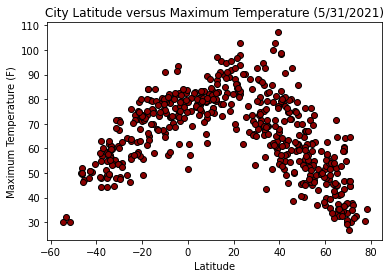

In [12]:
#figure out one, and that's the template for all.
##use plt.scatter . Then label title, xlabel, ylabel. Gonna use the grid. Use .savefig for .png files.
###documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
####color documenation: https://matplotlib.org/stable/gallery/color/named_colors.html
plt.scatter(weather_df['Latitude'], weather_df['Maximum Temperature'], color="darkred", edgecolor="black")

plt.title("City Latitude versus Maximum Temperature (5/31/2021)")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.savefig("../Images/Lat_v_MaxT.png")

## Latitude vs. Humidity Plot

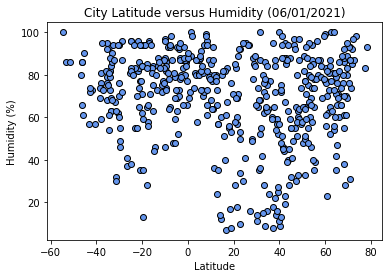

In [14]:
#with the code successfully running for Latitude Vs. Temperature, copy code as template and re-code as needed for task
##make sure to change output .png names
###just realized i didn't change the date from yesterday for the first plot. not going to there, will do it for work today.
plt.scatter(weather_df['Latitude'], weather_df['Humidity'], color="cornflowerblue", edgecolor="black")

plt.title("City Latitude versus Humidity (06/01/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/Lat_v_Hum.png")

## Latitude vs. Cloudiness Plot

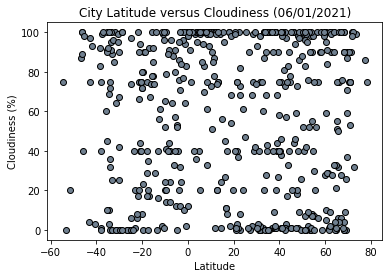

In [20]:
#ctrl+c ctrl+v
##make sure to change output .png name and date
###just realized i didn't output clouds/cloudiness data in the DataFrame step. Have to go back and rerun it and fix it.
####went back and re-ran cells. DF updated. Moving forward
plt.scatter(weather_df['Latitude'], weather_df['Clouds'], color="slategrey", edgecolor="black")

plt.title("City Latitude versus Cloudiness (06/01/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/Lat_v_Cloud.png")

## Latitude vs. Wind Speed Plot

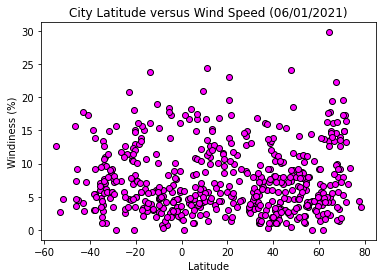

In [21]:
#ctrl+c ctrl+v
##make sure to change output .png name and date
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'], color="fuchsia", edgecolor="black")

plt.title("City Latitude versus Wind Speed (06/01/2021)")
plt.xlabel("Latitude")
plt.ylabel("Windiness (%)")
plt.savefig("../Images/Lat_v_Wind.png")

## Linear Regression

In [40]:
#already imported linregress in the depnendencies. Checked. Confirmed.
##Have to do this with both hemispheres. So start by creating DataFrames for each hemisphere.
n_hemisphere_df = weather_df.loc[(weather_df['Latitude']>0)]
#n_hemisphere_df.head()
s_hemisphere_df = weather_df.loc[(weather_df['Latitude']<0)]
#s_hemisphere_df.head()

###now that we have DFs, we can perform the regression.
####documentation here: documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
#####first define the function
def lin_regr(x, y, yaxis):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    line_equation = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    y_pred = intercept + slope*x

##plot test not working. going to try it for north and south hemispere data and see if i need to troubleshoot.    
#plt.scatter(x, y)
#plt.plot(x, y_pred, "r-")
#plt.xlabel('Latitude')
#plt.ylaberl(yaxis)
#print(f"r-squared: {rvalue}")
#plt.show()


In [45]:
#Plot the results in the cell above to see if it's reasonable.
##having errors running in this cell, moving up code to previous cell

n_hemisphere_df.count()

City                   343
Country                343
Latitude               343
Longitude              343
Maximum Temperature    343
Humidity               343
Clouds                 343
Wind Speed             343
Date                   343
dtype: int64

In [46]:
s_hemisphere_df.count()


City                   183
Country                183
Latitude               183
Longitude              183
Maximum Temperature    183
Humidity               183
Clouds                 183
Wind Speed             183
Date                   183
dtype: int64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [42]:
#run the linregress for max temp vs. latitude
##throwing an error. code is off. troubleshooting.
x = n_hemisphere_df['Latitude']
y = n_hemisphere_df['Maximum Temperature']
lin_regr(x,y, 'Maximum Temperature')

plt.savefig("../Images/NHemi_Temp_v_Lat.png")

<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression